In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive/data/')

Mounted at /content/drive


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Anet(nn.Module):
    def __init__(self, chns=1):
        super(Anet, self).__init__()
        self.chns = chns
        self.conv1 = nn.Conv2d(1, self.chns, kernel_size=(33,1), padding=(16,0), padding_mode='replicate', bias=False, groups=1) #replicate ### only one channel
       
        self.conv2 = nn.Conv2d(self.chns, 1, kernel_size=(1,33), padding=(0,16), padding_mode='replicate', bias=False, groups=1) #circular

    def forward(self, x):
        x1 =self.conv1(x)
        x2 = F.relu(self.conv2(x1))
        #x2 = self.conv2(x1)

        U = model.conv1.weight.detach().clone()
        V = model.conv2.weight.detach().clone()
        return x2,x1,U,V
model = Anet().to(device)
print(model)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Anet(nn.Module):
    def __init__(self):
        super(Anet, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, kernel_size=(33,1), padding=(16,0), padding_mode='replicate', bias=False, groups=1) #replicate ### only one channel
       
        self.conv2 = nn.Conv2d(1, 1, kernel_size=(1,33), padding=(0,16), padding_mode='replicate', bias=False, groups=1) #circular
    def forward(self, x):
        x1 =self.conv1(x)
        x2 = F.relu(self.conv2(x1))
        #x2 = self.conv2(x1)

        U = model.conv1.weight.detach().clone()
        V = model.conv2.weight.detach().clone()
        return x2,x1,U,V
model = Anet().to(device)
print(model)

Anet(
  (conv1): Conv2d(1, 1, kernel_size=(33, 1), stride=(1, 1), padding=(16, 0), bias=False, padding_mode=replicate)
  (conv2): Conv2d(1, 1, kernel_size=(1, 33), stride=(1, 1), padding=(0, 16), bias=False, padding_mode=replicate)
)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Anet(nn.Module):
    def __init__(self):
        super(Anet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=(33,1), padding=(8,8), padding_mode='replicate') 
       
        self.conv2 = nn.Conv2d(64, 1, kernel_size=(1,33), padding=(8,8), padding_mode='replicate')
    def forward(self, x):
        x =self.conv1(x)
        x = F.relu(self.conv2(x))
        

        U = model.conv1.weight.detach().clone()
        V = model.conv2.weight.detach().clone()
        return x,U,V

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Anet(nn.Module):
    def __init__(self):
        super(Anet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=(33,1), padding=(16,0), padding_mode='replicate') 
       
        self.conv2 = nn.Conv2d(64, 1, kernel_size=(1,33), padding=(0,16), padding_mode='replicate')
    def forward(self, x):
        x =self.conv1(x)
        x = F.relu(self.conv2(x))
        

        U = model.conv1.weight.detach().clone()
        V = model.conv2.weight.detach().clone()
        return x,U,V

In [ ]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import time
import h5py
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torchvision.utils import save_image
matplotlib.style.use('ggplot')

In [ ]:
# parameters
batch_size = 64 
epochs = 90
lr = 0.001 
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# input image dimensions
img_rows, img_cols = 33, 33
out_rows, out_cols = 33, 33

In [ ]:
file = h5py.File('/content/drive/My Drive/data/train21F.h5')
# `in_train` has shape (21884, 33, 33, 1) which corresponds to
# 21884 image patches of 33 pixels height & width and 1 color channel

###################
###in_train = file['input'][:] # the training data
###out_train = file['label'][:] # the training labels
##################

out_train = file['input'][:] # the training labels
in_train = file['label'][:] # the training data #
file.close()
# change the values to float32
in_train = in_train.astype('float32')
out_train = out_train.astype('float32')

In [ ]:
(x_train, x_val, y_train, y_val) = train_test_split(in_train, out_train, test_size=0.25)
print('Training samples: ', x_train.shape[0])
print('Validation samples: ', x_val.shape[0])

In [ ]:
# the dataset module
class AnetDataset(Dataset):
    def __init__(self, image_data, labels):
        self.image_data = image_data
        self.labels = labels
    def __len__(self):
        return (len(self.image_data))
    def __getitem__(self, index):
        image = self.image_data[index]
        label = self.labels[index]
        return (
            torch.tensor(image, dtype=torch.float),
            torch.tensor(label, dtype=torch.float)
        )

In [ ]:
# train and validation data
train_data = AnetDataset(x_train, y_train)
val_data = AnetDataset(x_val, y_val)
# train and validation loaders
train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)

In [ ]:
# initialize the model
print('Computation device: ', device)
#model = anet.Anet().to(device)
model = Anet().to(device)
#print(model)
model

Computation device:  cpu


Anet(
  (conv1): Conv2d(1, 1, kernel_size=(33, 1), stride=(1, 1), padding=(16, 0), bias=False, padding_mode=replicate)
  (conv2): Conv2d(1, 1, kernel_size=(1, 33), stride=(1, 1), padding=(0, 16), bias=False, padding_mode=replicate)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9) ####  momentum*****
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
        optimizer,
        mode='min',
        patience=5,
        factor=0.5,
        verbose=True
    )

In [ ]:
import math

In [ ]:
# loss function 
obj=nn.MSELoss()

In [ ]:
##############
def user_loss(recon_y, y, U, V, alpha=0.0001):

    E = torch.subtract(y, recon_y)
    #print(y.shape)  
    #print(recon_y.shape)  
    #print(E.shape)  
    sumE2 = torch.mean(torch.mul(E, E))
    sumU2 = torch.mean(torch.mul(U, U))
    sumV2 = torch.mean(torch.mul(V, V))

    obj = sumE2 + alpha*(sumU2 + sumV2) 

    return obj

In [ ]:
##################
def psnr(label, outputs, max_val=1.):
    """
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE).
    https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Definition
    
    """
    label = label.cpu().detach().numpy()
    outputs = outputs.cpu().detach().numpy()
    img_diff = outputs - label
    rmse = math.sqrt(np.mean((img_diff) ** 2))
    if rmse == 0:
        return 100
    else:
        PSNR = 20 * math.log10(max_val / rmse)
        return PSNR

In [ ]:
################
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# loss function 
#loss = nn.MSELoss()
#xo,U, V  = model(x)
#criterion = user_loss(recon_y,y ,U,V)


In [ ]:
def train(model, dataloader):
    model.train()
    running_loss = 0.0
    ##running_psnr = 0.0
    for bi, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        image_data = data[0].to(device)
        label = data[1].to(device)
        
        # zero grad the optimizer
        optimizer.zero_grad()
        #outputs = model(image_data)
        x2,_, U, V  = model(image_data)
        #outputs, U, V  = model(image_data)
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters()) ###########
        loss = obj(x2, label)
        loss= loss +  0.001*l2_norm ######################
        ###loss = user_loss(outputs, label,U,V)
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        # add loss of each item (total items in a batch = batch size)
        running_loss += loss.item()
        # calculate batch psnr (once every `batch_size` iterations)
        ##batch_psnr =  psnr(label, outputs)
        ##running_psnr += batch_psnr
    final_loss = running_loss/len(dataloader.dataset)
    #final_psnr = running_psnr/int(len(train_data)/dataloader.batch_size)
    return final_loss ## final_psnr

In [ ]:
def validate(model, dataloader, epoch):
    model.eval()
    running_loss = 0.0
    ##running_psnr = 0.0
    with torch.no_grad():
        for bi, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            image_data = data[0].to(device)
            label = data[1].to(device)
            x2,_, U, V  = model(image_data)
        #outputs, U, V  = model(image_data)
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters()) ###########
            loss = obj(x2, label)
            loss= loss +  0.001*l2_norm ######################
            #outputs, U, V = model(image_data)
            #loss = user_loss(outputs, label,U,V)
            # add loss of each item (total items in a batch = batch size) 
            running_loss += loss.item()
            # calculate batch psnr (once every `batch_size` iterations)
            ##batch_psnr = psnr(label, outputs)
            ##running_psnr += batch_psnr
        outputs = x2.cpu()
        save_image(outputs, f"/content/drive/My Drive/outs22f21/val{epoch}.png")
        #save_image(outputs, f"/content/drive/My Drive/outs9f/val{epoch}.png")
    final_loss = running_loss/len(dataloader.dataset)
    ##final_psnr = running_psnr/int(len(val_data)/dataloader.batch_size)
    return final_loss ##, final_psnr

In [ ]:
train_loss, val_loss = [], []
##train_psnr, val_psnr = [], []
start = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1} of {epochs}")
    train_epoch_loss= train(model, train_loader)
    val_epoch_loss = validate(model, val_loader, epoch)
    ##print(f"Train PSNR: {train_epoch_psnr:.3f}")
    ##print(f"Val PSNR: {val_epoch_psnr:.3f}")
    train_loss.append(train_epoch_loss)
    ##train_psnr.append(train_epoch_psnr)
    val_loss.append(val_epoch_loss)
    ##val_psnr.append(val_epoch_psnr)
end = time.time()
print(f"Finished training in: {((end-start)/60):.3f} minutes")

Epoch 1 of 90


3074it [00:19, 157.44it/s]                          
1025it [00:08, 116.07it/s]                          


Epoch 2 of 90


3074it [00:24, 123.24it/s]                          
1025it [00:05, 199.41it/s]                          


Epoch 3 of 90


3074it [00:23, 132.29it/s]                          
1025it [00:05, 180.86it/s]                          


Epoch 4 of 90


3074it [00:19, 155.09it/s]                          
1025it [00:04, 245.30it/s]                          


Epoch 5 of 90


3074it [00:20, 151.91it/s]                          
1025it [00:04, 243.65it/s]                          


Epoch 6 of 90


3074it [00:19, 161.05it/s]                          
1025it [00:04, 252.04it/s]                          


Epoch 7 of 90


3074it [00:19, 160.65it/s]                          
1025it [00:04, 244.72it/s]                          


Epoch 8 of 90


3074it [00:19, 156.16it/s]                          
1025it [00:04, 240.03it/s]                          


Epoch 9 of 90


3074it [00:19, 159.16it/s]                          
1025it [00:03, 269.72it/s]                          


Epoch 10 of 90


3074it [00:17, 174.85it/s]                          
1025it [00:03, 280.23it/s]                          


Epoch 11 of 90


3074it [00:18, 167.63it/s]                          
1025it [00:04, 249.96it/s]


Epoch 12 of 90


3074it [00:18, 161.81it/s]                          
1025it [00:04, 236.63it/s]                          


Epoch 13 of 90


3074it [00:19, 159.70it/s]
1025it [00:03, 261.90it/s]                          


Epoch 14 of 90


3074it [00:19, 158.99it/s]                          
1025it [00:04, 240.61it/s]                          


Epoch 15 of 90


3074it [00:18, 170.31it/s]                          
1025it [00:04, 241.35it/s]                          


Epoch 16 of 90


3074it [00:18, 164.61it/s]                          
1025it [00:04, 245.91it/s]                          


Epoch 17 of 90


3074it [00:19, 161.40it/s]                          
1025it [00:03, 260.17it/s]                          


Epoch 18 of 90


3074it [00:18, 167.08it/s]                          
1025it [00:03, 265.41it/s]                          


Epoch 19 of 90


3074it [00:18, 165.56it/s]                          
1025it [00:04, 253.27it/s]                          


Epoch 20 of 90


3074it [00:18, 168.51it/s]                          
1025it [00:04, 252.10it/s]                          


Epoch 21 of 90


3074it [00:18, 166.00it/s]                          
1025it [00:03, 272.87it/s]                          


Epoch 22 of 90


3074it [00:18, 170.40it/s]                          
1025it [00:04, 245.69it/s]                          


Epoch 23 of 90


3074it [00:19, 159.84it/s]                          
1025it [00:03, 263.95it/s]                          


Epoch 24 of 90


3074it [00:18, 168.64it/s]                          
1025it [00:03, 262.09it/s]                          


Epoch 25 of 90


3074it [00:18, 169.54it/s]                          
1025it [00:03, 267.04it/s]                          


Epoch 26 of 90


3074it [00:19, 161.70it/s]                          
1025it [00:04, 247.66it/s]                          


Epoch 27 of 90


3074it [00:18, 161.81it/s]                          
1025it [00:04, 246.73it/s]                          


Epoch 28 of 90


3074it [00:19, 157.63it/s]                          
1025it [00:04, 244.17it/s]                          


Epoch 29 of 90


3074it [00:20, 151.54it/s]                          
1025it [00:04, 219.93it/s]                          


Epoch 30 of 90


3074it [00:20, 148.87it/s]                          
1025it [00:04, 226.05it/s]                          


Epoch 31 of 90


3074it [00:19, 161.70it/s]                          
1025it [00:04, 249.72it/s]                          


Epoch 32 of 90


3074it [00:19, 159.83it/s]                          
1025it [00:04, 255.30it/s]                          


Epoch 33 of 90


3074it [00:18, 163.73it/s]                          
1025it [00:04, 244.18it/s]                          


Epoch 34 of 90


3074it [00:17, 178.96it/s]                          
1025it [00:04, 207.64it/s]                          


Epoch 35 of 90


3074it [00:21, 141.15it/s]
1025it [00:05, 202.09it/s]                          


Epoch 36 of 90


3074it [00:21, 141.43it/s]                          
1025it [00:04, 208.41it/s]                          


Epoch 37 of 90


3074it [00:21, 142.07it/s]                          
1025it [00:05, 203.69it/s]                          


Epoch 38 of 90


3074it [00:21, 142.77it/s]                          
1025it [00:04, 228.54it/s]                          


Epoch 39 of 90


3074it [00:19, 159.42it/s]                          
1025it [00:03, 257.84it/s]                          


Epoch 40 of 90


3074it [00:18, 163.45it/s]                          
1025it [00:04, 249.70it/s]                          


Epoch 41 of 90


3074it [00:18, 166.64it/s]                          
1025it [00:03, 266.48it/s]                          


Epoch 42 of 90


3074it [00:18, 166.27it/s]                          
1025it [00:03, 257.09it/s]                          


Epoch 43 of 90


3074it [00:17, 173.88it/s]
1025it [00:04, 206.33it/s]                          


Epoch 44 of 90


3074it [00:21, 140.78it/s]                          
1025it [00:05, 201.61it/s]                          


Epoch 45 of 90


3074it [00:22, 137.70it/s]                          
1025it [00:04, 212.33it/s]                          


Epoch 46 of 90


3074it [00:21, 144.07it/s]                          
1025it [00:03, 256.38it/s]                          


Epoch 47 of 90


3074it [00:18, 163.54it/s]
1025it [00:04, 238.76it/s]                          


Epoch 48 of 90


3074it [00:19, 159.51it/s]
1025it [00:04, 251.48it/s]                          


Epoch 49 of 90


3074it [00:19, 154.87it/s]                          
1025it [00:03, 258.30it/s]                          


Epoch 50 of 90


3074it [00:18, 168.32it/s]                          
1025it [00:03, 257.22it/s]                          


Epoch 51 of 90


3074it [00:18, 167.15it/s]                          
1025it [00:03, 265.55it/s]                          


Epoch 52 of 90


3074it [00:18, 167.14it/s]                          
1025it [00:04, 255.35it/s]                          


Epoch 53 of 90


3074it [00:18, 162.27it/s]                          
1025it [00:04, 235.86it/s]                          


Epoch 54 of 90


3074it [00:19, 155.70it/s]                          
1025it [00:04, 235.85it/s]                          


Epoch 55 of 90


3074it [00:19, 154.20it/s]                          
1025it [00:04, 238.85it/s]                          


Epoch 56 of 90


3074it [00:20, 152.65it/s]                          
1025it [00:04, 236.26it/s]                          


Epoch 57 of 90


3074it [00:19, 156.45it/s]                          
1025it [00:04, 235.82it/s]                          


Epoch 58 of 90


3074it [00:19, 156.11it/s]                          
1025it [00:04, 244.14it/s]                          


Epoch 59 of 90


3074it [00:19, 156.05it/s]                          
1025it [00:04, 243.39it/s]


Epoch 60 of 90


3074it [00:19, 155.20it/s]                          
1025it [00:04, 240.13it/s]                          


Epoch 61 of 90


3074it [00:20, 152.14it/s]                          
1025it [00:04, 231.83it/s]                          


Epoch 62 of 90


3074it [00:20, 151.91it/s]                          
1025it [00:04, 219.31it/s]                          


Epoch 63 of 90


3074it [00:21, 146.00it/s]                          
1025it [00:04, 227.76it/s]


Epoch 64 of 90


3074it [00:19, 155.99it/s]                          
1025it [00:04, 241.55it/s]                          


Epoch 65 of 90


3074it [00:19, 157.33it/s]                          
1025it [00:04, 237.92it/s]                          


Epoch 66 of 90


3074it [00:19, 156.58it/s]                          
1025it [00:04, 242.90it/s]                          


Epoch 67 of 90


3074it [00:19, 155.35it/s]                          
1025it [00:04, 219.31it/s]                          


Epoch 68 of 90


3074it [00:19, 156.11it/s]                          
1025it [00:04, 239.36it/s]                          


Epoch 69 of 90


3074it [00:19, 156.70it/s]                          
1025it [00:04, 239.65it/s]                          


Epoch 70 of 90


3074it [00:19, 157.83it/s]                          
1025it [00:04, 250.58it/s]                          


Epoch 71 of 90


3074it [00:19, 159.68it/s]                          
1025it [00:04, 248.56it/s]                          


Epoch 72 of 90


3074it [00:19, 157.96it/s]                          
1025it [00:04, 244.15it/s]                          


Epoch 73 of 90


3074it [00:19, 161.69it/s]                          
1025it [00:04, 243.20it/s]                          


Epoch 74 of 90


3074it [00:19, 158.19it/s]                          
1025it [00:04, 237.70it/s]                          


Epoch 75 of 90


3074it [00:20, 149.54it/s]                          
1025it [00:04, 231.14it/s]                          


Epoch 76 of 90


3074it [00:20, 149.91it/s]                          
1025it [00:04, 217.17it/s]                          


Epoch 77 of 90


3074it [00:19, 155.29it/s]                          
1025it [00:04, 248.18it/s]                          


Epoch 78 of 90


3074it [00:19, 158.06it/s]                          
1025it [00:04, 250.12it/s]                          


Epoch 79 of 90


3074it [00:20, 152.27it/s]                          
1025it [00:04, 222.33it/s]                          


Epoch 80 of 90


3074it [00:19, 154.49it/s]                          
1025it [00:04, 227.29it/s]                          


Epoch 81 of 90


3074it [00:20, 149.78it/s]                          
1025it [00:04, 245.63it/s]                          


Epoch 82 of 90


3074it [00:19, 156.05it/s]                          
1025it [00:04, 253.48it/s]                          


Epoch 83 of 90


3074it [00:20, 150.77it/s]                          
1025it [00:04, 233.31it/s]                          


Epoch 84 of 90


3074it [00:19, 155.00it/s]                          
1025it [00:04, 222.25it/s]                          


Epoch 85 of 90


3074it [00:19, 154.82it/s]                          
1025it [00:04, 231.82it/s]                          


Epoch 86 of 90


3074it [00:20, 151.15it/s]                          
1025it [00:04, 243.07it/s]                          


Epoch 87 of 90


3074it [00:19, 154.55it/s]                          
1025it [00:04, 226.63it/s]                          


Epoch 88 of 90


3074it [00:20, 150.66it/s]                          
1025it [00:04, 242.80it/s]                          


Epoch 89 of 90


3074it [00:20, 149.92it/s]                          
1025it [00:04, 219.72it/s]                          


Epoch 90 of 90


3074it [00:20, 149.77it/s]                          
1025it [00:04, 233.57it/s]                          

Finished training in: 36.064 minutes


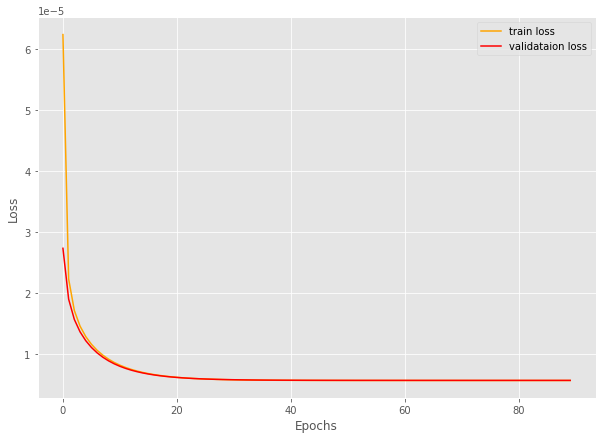

In [ ]:
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/My Drive/loss21ff.png')
plt.show()

In [ ]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#model = model()
model.load_state_dict(torch.load('/content/drive/My Drive/model21ff.pth', map_location=device))

<All keys matched successfully>

In [ ]:
# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), '/content/drive/My Drive/model21ff.pth')

Saving model...


In [ ]:
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/My Drive/loss21ff.png')
plt.show()
# psnr plots
plt.figure(figsize=(10, 7))
plt.plot(train_psnr, color='green', label='train PSNR dB')
plt.plot(val_psnr, color='blue', label='validataion PSNR dB')
plt.xlabel('Epochs')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.savefig('/content/drive/My Drive/psnr.png')
plt.show()
# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), '/content/drive/My Drive//model18jjj.pth')

In [ ]:
import torch
import cv2

import numpy as np
import glob as glob
import os
from torchvision.utils import save_image

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive/model18jjj.pth/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = model.to(device)
model
#model=model.cpu()
#model.load_state_dict(torch.load('/content/drive/My Drive/model18.pth'))

Anet(
  (conv1): Conv2d(1, 1, kernel_size=(33, 1), stride=(1, 1), padding=(16, 0), bias=False, padding_mode=replicate)
  (conv2): Conv2d(1, 1, kernel_size=(1, 33), stride=(1, 1), padding=(0, 16), bias=False, padding_mode=replicate)
)

In [ ]:
from google.colab.patches import cv2_imshow

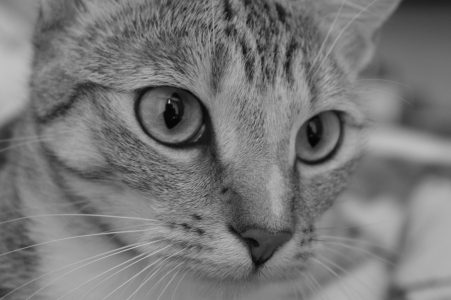

(300, 451, 1)


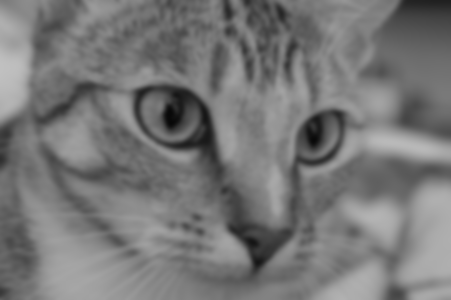

In [ ]:
### inv
image_paths = glob.glob('/content/drive/My Drive/test_chelsea/test_chelsea*')
#image_paths = glob.glob('/content/drive/My Drive/MYout17jj.png*')
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    test_image_name = image_path.split(os.path.sep)[-1].split('.')[0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(image.shape[0], image.shape[1], 1)
    cv2.imwrite(f"/content/drive/My Drive/catcake.png", image)
    image = image #/ 255
    
    #cv2.imshow('Greyscale image', image)
    cv2_imshow(image)
    cv2.waitKey(0)
    model.eval()
    with torch.no_grad():
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        image = torch.tensor(image, dtype=torch.float).to(device)
        image = image.unsqueeze(0)
        x2,_, _,_= model(image)
        outputs = x2.cpu()
        #outputs, _, _ = model(image)
        #outputs = outputs.cpu()
    save_image(outputs, f"/content/drive/My Drive/MYcatcake.png")
    outputs = outputs.detach().numpy()
    outputs = outputs.reshape(outputs.shape[2], outputs.shape[3], outputs.shape[1])
    print(outputs.shape)
    #cv2.imshow('Output', outputs)
    cv2_imshow(outputs)
    cv2.waitKey(0)

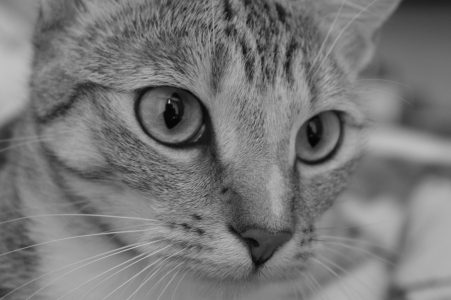

(300, 451, 1)


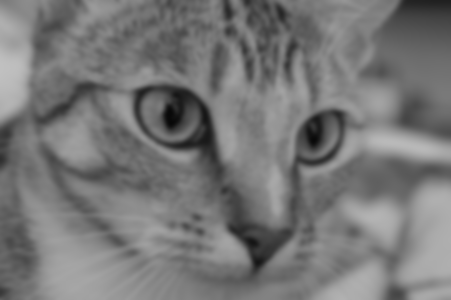

In [ ]:
### inv
image_paths = glob.glob('/content/drive/My Drive/test_chelsea/test_chelsea*')
#image_paths = glob.glob('/content/drive/My Drive/MYout17jj.png*')
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    test_image_name = image_path.split(os.path.sep)[-1].split('.')[0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(image.shape[0], image.shape[1], 1)
    cv2.imwrite(f"/content/drive/My Drive/catcake.png", image)
    image = image #/ 255
    
    #cv2.imshow('Greyscale image', image)
    cv2_imshow(image)
    cv2.waitKey(0)
    model.eval()
    with torch.no_grad():
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        image = torch.tensor(image, dtype=torch.float).to(device)
        image = image.unsqueeze(0)
        x2,_, _,_= model(image)
        outputs = x2.cpu()
        #outputs, _, _ = model(image)
        #outputs = outputs.cpu()
    save_image(outputs, f"/content/drive/My Drive/MYcatcake.png")
    outputs = outputs.detach().numpy()
    outputs = outputs.reshape(outputs.shape[2], outputs.shape[3], outputs.shape[1])
    print(outputs.shape)
    #cv2.imshow('Output', outputs)
    cv2_imshow(outputs)
    cv2.waitKey(0)

In [ ]:
model.eval()
model.cpu
image.cpu
x2,_,U,V = model(image)

U=U.squeeze(1)
V=V.squeeze(0)
U.shape
U=U.cpu()
V=V.cpu()

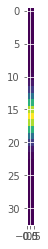

In [ ]:
plt.imshow(U[0].detach().numpy())

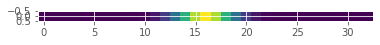

In [ ]:
plt.imshow(V[0].detach().numpy())

In [ ]:
U[0]

tensor([[ 8.3629e-04],
        [ 5.3667e-04],
        [ 1.1817e-05],
        [ 6.3111e-05],
        [ 3.3987e-04],
        [-2.3578e-04],
        [ 2.0925e-04],
        [-2.3702e-04],
        [ 2.0250e-04],
        [ 6.1735e-04],
        [ 3.6622e-03],
        [ 1.2618e-02],
        [ 3.3224e-02],
        [ 7.0236e-02],
        [ 1.2031e-01],
        [ 1.6492e-01],
        [ 1.8708e-01],
        [ 1.6418e-01],
        [ 1.2022e-01],
        [ 7.0620e-02],
        [ 3.3442e-02],
        [ 1.2884e-02],
        [ 3.5529e-03],
        [ 7.9170e-04],
        [-1.2067e-04],
        [ 1.5993e-04],
        [-3.4586e-04],
        [ 2.7705e-04],
        [ 1.4455e-04],
        [ 1.7267e-04],
        [ 4.5092e-04],
        [ 2.1966e-04],
        [ 1.0419e-03]])

In [ ]:
V[0]

tensor([[ 8.6032e-04,  2.3695e-04, -1.0285e-05,  1.6479e-04, -1.3844e-04,
          9.6518e-05, -7.6055e-05, -1.4009e-05,  5.1143e-05,  5.9059e-04,
          3.4858e-03,  1.2117e-02,  3.2341e-02,  6.9948e-02,  1.1981e-01,
          1.6508e-01,  1.8761e-01,  1.6477e-01,  1.2006e-01,  6.9798e-02,
          3.2932e-02,  1.2191e-02,  3.2833e-03,  7.7694e-04, -1.6061e-04,
          9.3235e-05, -5.8397e-05, -3.9406e-05,  2.7267e-04,  7.4169e-05,
          2.4591e-04,  1.1320e-04,  8.8534e-04]])

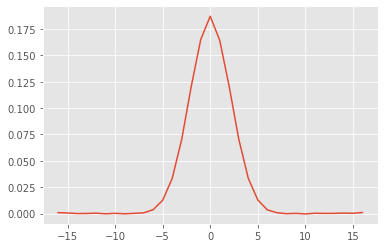

In [ ]:
range = np.linspace(-int(33/2),int(33/2),33)
plt.plot(range , U[0])

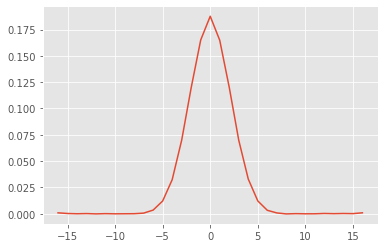

In [ ]:
rangeV = np.linspace(-int(33/2),int(33/2),33)
plt.plot(rangeV , V[0].T)

In [ ]:
UV = np.outer(U[0], V[0])
UV.shape

In [ ]:
UV

array([[ 7.19476702e-07,  1.98162539e-07, -8.60099547e-09, ...,
         2.05653706e-07,  9.46643439e-08,  7.40400083e-07],
       [ 4.61703308e-07,  1.27165066e-07, -5.51944002e-09, ...,
         1.31972300e-07,  6.07480999e-08,  4.75130292e-07],
       [ 1.01665245e-08,  2.80012458e-09, -1.21535892e-10, ...,
         2.90597812e-09,  1.33764921e-09,  1.04621813e-08],
       ...,
       [ 3.87931692e-07,  1.06846450e-07, -4.63753569e-09, ...,
         1.10885580e-07,  5.10416776e-08,  3.99213292e-07],
       [ 1.88980536e-07,  5.20501438e-08, -2.25917085e-09, ...,
         5.40178000e-08,  2.48649030e-08,  1.94476357e-07],
       [ 8.96366373e-07,  2.46882564e-07, -1.07156266e-08, ...,
         2.56215486e-07,  1.17938406e-07,  9.22433969e-07]], dtype=float32)

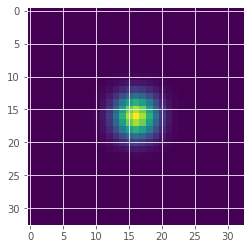

In [ ]:
plt.imshow(UV)

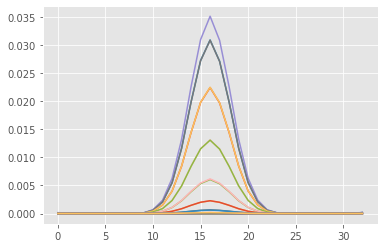

In [ ]:
plt.plot(UV)

In [ ]:
from PIL import Image
from torchvision import transforms

import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import requests
from io import BytesIO


class GaussianBlur2(object):
    
    def __init__(self, kernel_size=33):
        radias = kernel_size // 2
        kernel_size = radias * 2 + 1
        #self.pad = nn.ReflectionPad2d(radias)
        #self.pad = nn.ReplicationPad2d(radias) ### capacity
        self.blur_h = nn.Conv2d(1, 1, kernel_size=(kernel_size, 1), padding=(16,0), padding_mode='replicate'
                                , bias=False, groups=1)
        self.blur_v = nn.Conv2d(1, 1, kernel_size=(1, kernel_size),padding=(0,16), padding_mode='replicate'
                               , bias=False, groups=1)
        self.k = kernel_size
        self.r = radias

        self.tensor_to_pil = transforms.ToPILImage()

    def __call__(self, img):
        img = torch.tensor(np.asarray(img)).unsqueeze(0).float()
        img=img.unsqueeze(0).float() ###
        img = img.permute(0, 1, 2, 3)

        sigma = 2
        x = np.arange(-self.r, self.r + 1)
        x = np.exp(-np.power(x, 2) / (2 * sigma * sigma))
        x = x / x.sum()
        x = torch.from_numpy(x).view(1, -1).repeat(1, 1) #?

        self.blur_h.weight.data.copy_(x.view(1, 1, self.k, 1))
        self.blur_v.weight.data.copy_(x.view(1, 1, 1, self.k))

        with torch.no_grad(): # chon nemikhay kernel taghir kone!!!
            #img = self.pad(img)
            img = self.blur_h(img)
            img = self.blur_v(img)
            #img = img.round()
            img = img.squeeze()


        ################img = self.tensor_to_pil((img / 255).float().cpu())

        return img
#import cv2
#img = cv2.imread('/content/test_chelsea.png', 0)

#torchimg = GaussianBlur2()(img)

In [ ]:
radias = kernel_size // 2
kernel_size = radias * 2 + 1

In [ ]:
radias = 33 // 2
radias

16

In [ ]:
sigma = 2
x = np.arange(-16, 16 + 1)
x = np.exp(-np.power(x, 2) / (2 * sigma * sigma))
x = x / x.sum()

In [ ]:
x = np.arange(-16, 16 + 1)
x

array([-16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16])

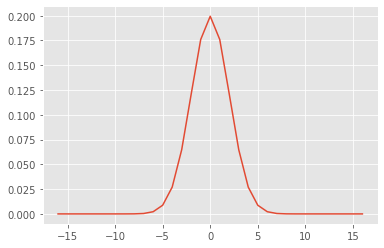

In [ ]:
range = np.linspace(-int(33/2),int(33/2),33)
plt.plot(range , x)

In [ ]:

        sigma = 2
        x = np.arange(-self.r, self.r + 1)
        x = np.exp(-np.power(x, 2) / (2 * sigma * sigma))
        x = x / x.sum()